# Tai D. Nguyen - ECES 641 - HW2

## Table of content:

1. [Problem 1](#Problem-1)
2. [Problem 2](#Problem-2)
3. [Problem 3](#Problem-3)

# Problem 1

![prob1](prob1.jpg)

# Problem 2

![prob2](prob2.jpg)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Bio import SeqIO, AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio import Phylo
from Bio.Phylo.Consensus import *
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator

In [2]:
align = MultipleSeqAlignment([])
align.add_sequence('X', 'tacccgat')
align.add_sequence('Y', 'taaacgat')
align.add_sequence('Z', 'aaaacgcg')
align.add_sequence('W', 'aaaacgat')

In [3]:
calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator)
dm = calculator.get_distance(align)
upgmatree = constructor.upgma(dm)
print(upgmatree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.078125, name='Inner2')
            Clade(branch_length=0.15625, name='Z')
            Clade(branch_length=0.09375, name='Inner1')
                Clade(branch_length=0.0625, name='W')
                Clade(branch_length=0.0625, name='Y')
        Clade(branch_length=0.234375, name='X')


In [4]:
msas = bootstrap(align, 5)
msas = list(msas)

In [5]:
trees = []
for m in msas:
    dm = calculator.get_distance(m)
    upgmatree = constructor.upgma(dm)
    print(upgmatree)
    trees.append(upgmatree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.3125, name='Z')
        Clade(branch_length=0.1875, name='Inner2')
            Clade(branch_length=0.125, name='Inner1')
                Clade(branch_length=0.0, name='W')
                Clade(branch_length=0.0, name='Y')
            Clade(branch_length=0.125, name='X')
Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.078125, name='Inner2')
            Clade(branch_length=0.03125, name='Inner1')
                Clade(branch_length=0.0625, name='W')
                Clade(branch_length=0.0625, name='Z')
            Clade(branch_length=0.09375, name='Y')
        Clade(branch_length=0.171875, name='X')
Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.21875, name='Inner1')
            Clade(branch_length=0.0625, name='W')
            Clade(branch_length=0.0625, name='Z')
        Clade(branch_length=0.15625, name='Inner2'

# Problem 3

In [6]:
with open("ecoli_lexA_align.fasta", "rU") as handle:
    records = list(SeqIO.parse(handle, "fasta"))

In [7]:
record_matrix = []
for rec in records:
    record_matrix.append(list(rec.seq.upper()))

record_matrix = pd.DataFrame(record_matrix)
record_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A,A,C,T,G,T,A,T,A,T,A,A,A,T,A,C,A,G,T,T
1,T,A,T,T,G,G,C,T,G,T,T,T,A,T,A,C,A,G,T,A
2,T,C,C,T,G,T,T,A,A,T,C,C,A,T,A,C,A,G,C,A
3,A,C,C,T,G,T,A,T,A,A,A,T,A,A,C,C,A,G,T,A
4,T,G,C,T,G,T,A,T,A,T,A,C,T,C,A,C,A,G,C,A
5,A,A,C,T,G,T,A,T,A,T,A,C,A,C,C,C,A,G,G,G
6,G,A,C,T,G,T,A,T,A,A,A,A,C,C,A,C,A,G,C,C
7,T,A,C,T,G,T,A,T,G,A,G,C,A,T,A,C,A,G,T,A
8,T,A,C,T,G,T,A,T,A,T,A,A,A,A,C,C,A,G,T,T
9,T,A,C,T,G,T,A,C,A,C,A,A,T,A,A,C,A,G,T,A


In [8]:
R_seq = []
b_l_table = []
e_n = 0.0
seq_len = record_matrix.shape[1]
for l in range(seq_len):
    H_l = 0
    b_l = []
    for b in 'ATCG':
        p_b_l = len(record_matrix[record_matrix[l] == b]) / seq_len
        if p_b_l > 0:
            H_l -= p_b_l * np.log2(p_b_l)
        b_l.append(p_b_l)
    R_l = 2 - (H_l + e_n)
    b_l = np.array(b_l) * R_l
    R_seq.append(R_l)
    b_l_table.append(b_l)

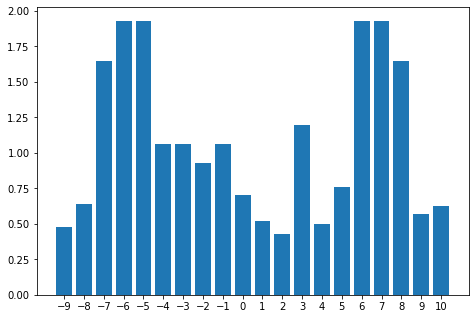

In [9]:
pos = np.linspace(-seq_len//2+1, seq_len//2, seq_len, dtype=int)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pos, R_seq)
ax.set_xticks(pos)

In [10]:
b_l_table = np.array(b_l_table).T
b_l_table = pd.DataFrame(b_l_table, index=['A', 'T', 'C', 'G'], columns=pos)
b_l_table

,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10
A,0.119334,0.414179,0.000000,0.000000,0.000000,0.053104,0.796560,0.046217,0.796560,0.139891,0.312381,0.128316,0.955335,0.148837,0.377566,0.000000,1.833214,0.000000,0.000000,0.375377
T,0.262536,0.031860,0.082355,1.833214,0.000000,0.796560,0.159312,0.693252,0.053104,0.454645,0.078095,0.149702,0.119417,0.223255,0.037757,0.000000,0.000000,0.082355,0.284183,0.156407
C,0.047734,0.095580,1.482391,0.000000,0.000000,0.000000,0.053104,0.092434,0.000000,0.034973,0.078095,0.128316,0.059708,0.099225,0.302053,1.833214,0.000000,0.000000,0.170510,0.031281
G,0.023867,0.063720,0.000000,0.000000,1.833214,0.159312,0.000000,0.046217,0.159312,0.034973,0.026032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.482391,0.085255,0.031281


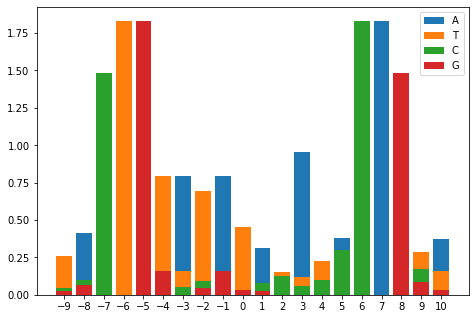

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pos, b_l_table.loc['A'], label='A')
ax.bar(pos, b_l_table.loc['T'], label='T')
ax.bar(pos, b_l_table.loc['C'], label='C')
ax.bar(pos, b_l_table.loc['G'], label='G')
ax.set_xticks(pos)
ax.legend()